In [117]:
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from dGbyG.config import train_data_path
from dGbyG.utils.custom_tools import rapid_linear_reg
from dGbyG.network.Dataset import Train_Dataset

In [2]:
color1 = (100/256,170/256,220/256)
color2 = (241/256,183/256,39/256)
color3 = (162/256,205/256,133/256)
color4 = (256/256,130/256,210/256)
color5 = (139/256,139/256,255/256)

label_fs = 10
legend_fs = 10

Reading the training data

In [126]:
TrainingData_df = pd.read_csv(train_data_path)
equation = TrainingData_df.loc[:, 'reaction']
standard_dG_prime = TrainingData_df.loc[:, 'standard_dg_prime']
TrainSet = Train_Dataset(equations=equation, dGs=standard_dG_prime)

print('dG num:', equation.shape[0])
print('molecules num:', TrainSet.S.shape[0])

dG num: 675
molecules num: 641


Supp. Fig. 1

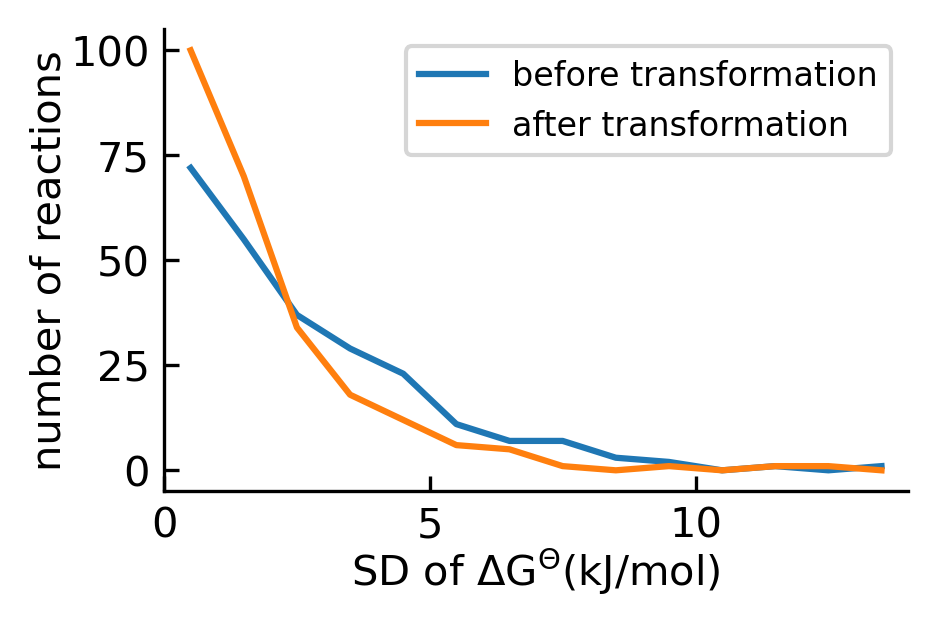

In [42]:
plt.figure(dpi=300, figsize=(3.2,2))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


y0,x0 = np.histogram(TrainingData_df.loc[:,'nontrans_std'], range=(0.0, 14.0), bins=14)
y1,x1 = np.histogram(TrainingData_df.loc[:,'std'], range=(0.0, 14.0), bins=14)

plt.ylabel(r'number of reactions'.format(chr(920)), fontsize=10, labelpad=0)
plt.xlabel(r'SD of $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=10, labelpad=0)

plt.plot(x0[1:]-0.5, y0, )
plt.plot(x1[1:]-0.5, y1, )

plt.legend(['before transformation', 'after transformation'], fontsize=8)

plt.xlim(0,14)
#plt.ylim(0,100)
plt.show()

Supp. Fig. 2

The linear model is: Y = 1.7482 + 0.0049431X
PearsonRResult(statistic=0.0855809646194914, pvalue=0.17914654680676884)
SignificanceResult(statistic=0.21441295066734897, pvalue=0.0006759872803590389)


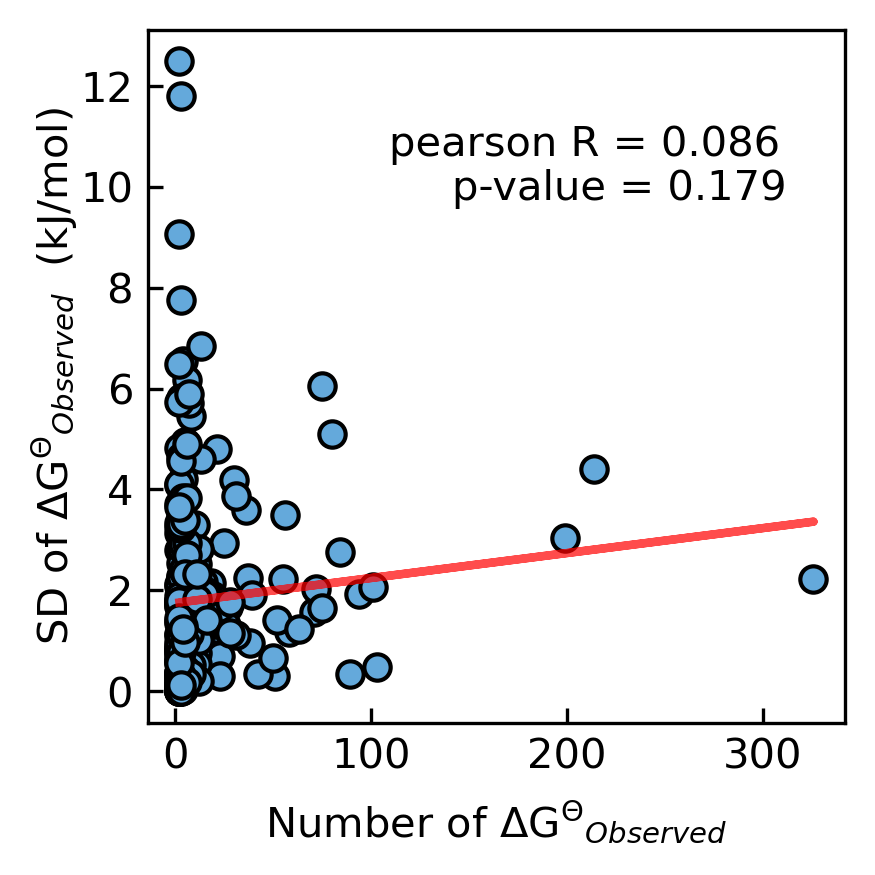

In [67]:
have_sd = pd.notna(TrainingData_df.loc[:,'std']) & (TrainingData_df.loc[:,'type']=='reaction dg')

plt.figure(dpi=300, figsize=(3,3))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

x = TrainingData_df.loc[:,'n'][have_sd]
y = TrainingData_df.loc[:,'std'][have_sd]
fit_y, pr, sr = rapid_linear_reg(x, y)

plt.scatter(x, y, edgecolors='black', color=(100/256,170/256,220/256), s=40, linewidths=1)
plt.plot(x, fit_y, linewidth=2, c='red',alpha=0.7)

plt.text(x=min(x)+(max(x)-min(x))*0.33, y=min(y)+(max(y)-min(y))*0.85, s='pearson R = {0}'.format(np.around(pr[0], decimals=3)), fontsize=10)
plt.text(x=min(x)+(max(x)-min(x))*0.43, y=min(y)+(max(y)-min(y))*0.78, s='p-value = {0}'.format(np.around(pr[1], decimals=3)), fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel(r'Number of $\Delta$G$^{0}$$_{1}$'.format(chr(920),'{Observed}'), fontsize=10, labelpad=5)
plt.ylabel(r'SD of $\Delta$G$^{0}$$_{1}$  (kJ/mol)'.format(chr(920),'{Observed}'), fontsize =10, labelpad=0)


plt.show()


The linear model is: Y = 1.5548 + 0.024501X
PearsonRResult(statistic=0.12308767590152805, pvalue=0.052872389781663184)
SignificanceResult(statistic=0.17220731341774131, pvalue=0.006556642241485819)


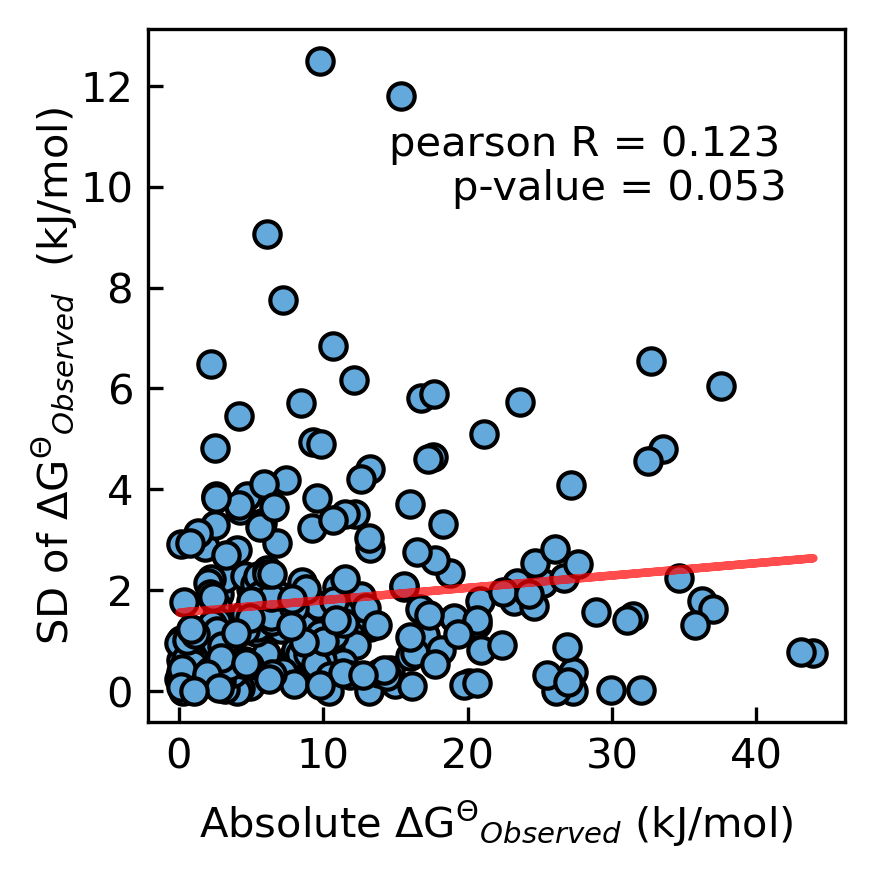

In [68]:
plt.figure(dpi=300, figsize=(3,3))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

x = abs(TrainingData_df.loc[:,'standard_dg_prime'][have_sd])
y = TrainingData_df.loc[:,'std'][have_sd]
fit_y, pr, sr = rapid_linear_reg(x, y)

plt.scatter(x, y, edgecolors='black', color=(100/256,170/256,220/256), s=40, linewidths=1)
plt.plot(x, fit_y, linewidth=2, c='red',alpha=0.7)

plt.text(x=min(x)+(max(x)-min(x))*0.33, y=min(y)+(max(y)-min(y))*0.85, s='pearson R = {0}'.format(np.around(pr[0], decimals=3)), fontsize=10)
plt.text(x=min(x)+(max(x)-min(x))*0.43, y=min(y)+(max(y)-min(y))*0.78, s='p-value = {0}'.format(np.around(pr[1], decimals=3)), fontsize=10)

plt.xticks(fontsize =10)
plt.yticks(fontsize =10)

plt.xlabel(r'Absolute $\Delta$G$^{0}$$_{1}$ (kJ/mol)'.format(chr(920),'{Observed}'), fontsize=10, labelpad=5)
plt.ylabel(r'SD of $\Delta$G$^{0}$$_{1}$  (kJ/mol)'.format(chr(920),'{Observed}'), fontsize =10, labelpad=0)

plt.show()

The linear model is: Y = 0.044531 + 1.6756X
PearsonRResult(statistic=0.29539761803353703, pvalue=2.1959329203199057e-06)
SignificanceResult(statistic=0.21512216468987672, pvalue=0.0006480797347304736)


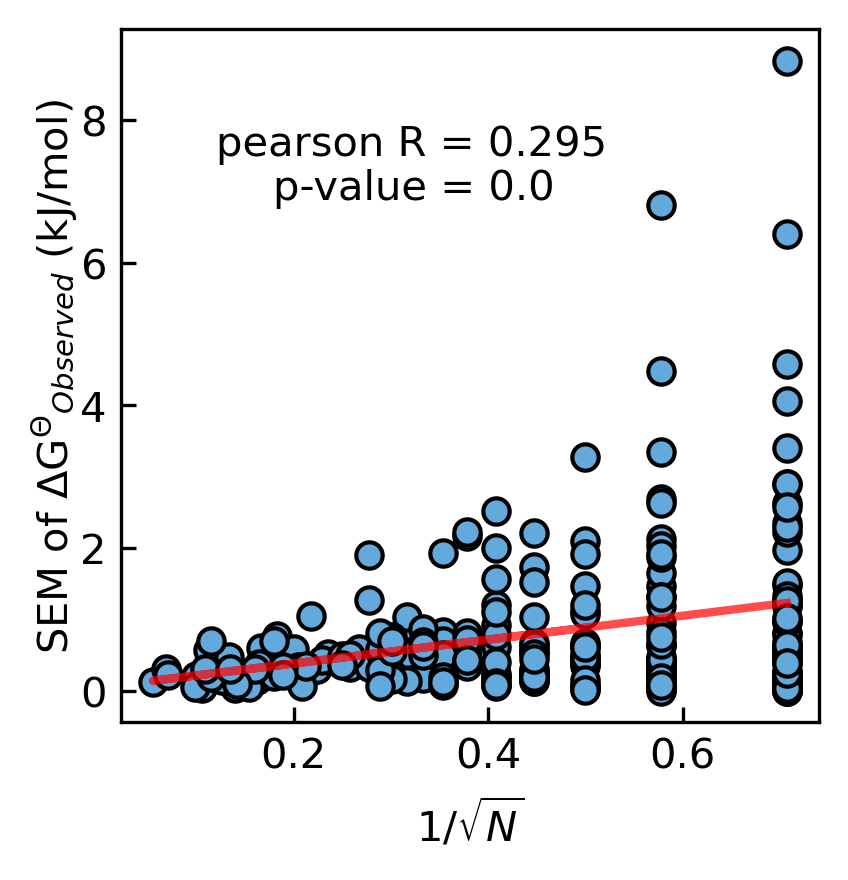

In [116]:
plt.figure(dpi=300, figsize=(3,3))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

x = 1/np.sqrt(TrainingData_df.loc[:,'n'][have_sd])
y = TrainingData_df.loc[:,'SEM'][have_sd]
fit_y, pr, sr = rapid_linear_reg(x, y)

plt.scatter(x, y, edgecolors='black', color=(100/256,170/256,220/256), s=40, linewidths=1)
plt.plot(x, fit_y, linewidth=2, c='red',alpha=0.7)

plt.text(x=min(x)+(max(x)-min(x))*0.10, y=min(y)+(max(y)-min(y))*0.85, s='pearson R = {0}'.format(np.around(pr[0], decimals=3)), fontsize=10)
plt.text(x=min(x)+(max(x)-min(x))*0.19, y=min(y)+(max(y)-min(y))*0.78, s='p-value = {0}'.format(np.around(pr[1], decimals=3)), fontsize=10)

plt.xticks(fontsize =10)
plt.yticks(fontsize =10)

#xlabel = r'Number of $\Delta$G$^{0}$$_{1}$'.format(chr(920), '{Observed}')
plt.xlabel(r'1/$\sqrt{N}$', fontsize=10, labelpad=5)
plt.ylabel(r'SEM of $\Delta$G$^{0}$$_{1}$ (kJ/mol)'.format(chr(920),'{Observed}'), fontsize =10, labelpad=0)

plt.show()

In [101]:
xlabel

'Number of $\\Delta$G$^Θ$$_{Observed}$'

Reading the 10-fold cross validation results data of dGbyG

In [4]:
results_dir = '../data/results_data/cross_validation_results'
Loss = []
Results = []
Final_p = []
R = []
for n in range(0,100):
    name = '10_fold_cross_validation_with_random_dG_'+str(n)
    loss = np.load(os.path.join(results_dir, name+'.npy')).mean(axis=0)
    res = pd.read_csv(os.path.join(results_dir, name+'.csv'), index_col=0)
    idx = np.argmin(loss)

    Loss.append(loss)
    Results.append(res)
    Final_p.append(res.loc[:,str(idx)].to_numpy())
    R.append(res['r'].to_numpy())

Loss = np.array(Loss)
R = np.array(R)
Final_p = np.array(Final_p)

p = Final_p.mean(axis=0)
e = p - real_r
ae = np.abs(e)

print('Medain of absolute error:', np.median(ae))
print('Mean of absolute error:', np.mean(ae))
print('RMSE:', np.mean(ae**2)**0.5)

Medain of absolute error: 3.9671209999987695
Mean of absolute error: 8.54708485902731
RMSE: 24.471880104874323


Fig. 1a

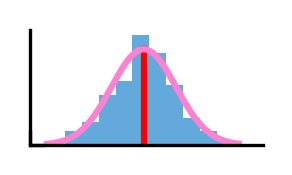

In [109]:
from scipy.stats import norm
ps = Final_p.T[600]

plt.figure(dpi=300, figsize=(1,0.5))
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.hist(ps, bins=10, density=True, color=color1)

interval = ps.std()*6
x = np.array([interval/100*i + (ps.mean()-interval/2) for i in range(100)])
y = norm.pdf(x ,ps.mean(), ps.std())

plt.plot([ps.mean(),ps.mean()], [0,max(y)], color='red')
plt.plot(x, y, color=color4, alpha=1)

plt.xticks([-30], [None])
plt.yticks([0], [None])
plt.xlim(-30,-19)
plt.show()

Fig 1. b

In [110]:
df = pd.DataFrame(data=[real_r, p, p-real_r, Final_p.std(axis=0)]).T.loc[is_rxn,:]
df = df.sort_values(by=2)

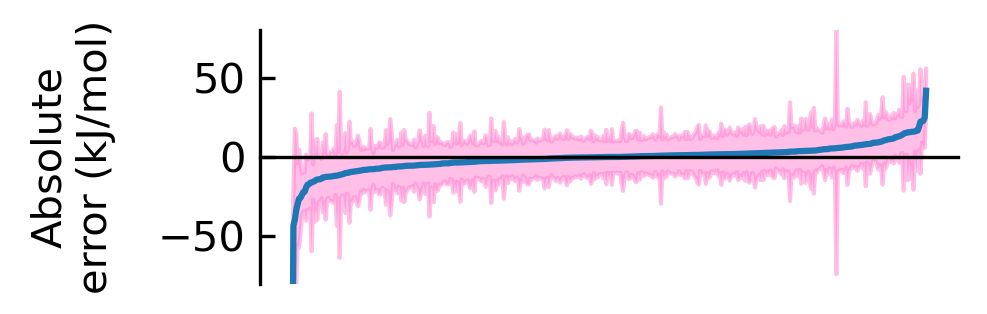

In [111]:
plt.figure(dpi=300, figsize=(3,1.1))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))


plt.plot(range(df.shape[0]), df.iloc[:,2])
#plt.plot(range(df.shape[0]), df.iloc[:,2]+df.iloc[:,3]*2+10, color=color4)
#plt.plot(range(df.shape[0]), df.iloc[:,2]-df.iloc[:,3]*2-10, color=color3)
plt.fill_between(range(df.shape[0]), df.iloc[:,2]+df.iloc[:,3]*2+10, df.iloc[:,2]-df.iloc[:,3]*2-10,color=color4, alpha=0.5)

plt.ylabel('Absolute\nerror (kJ/mol)'.format(chr(920)), fontsize=10, labelpad=10)

plt.ylim(-80,80)
plt.xticks([])
plt.show()

Fig 2.

The linear model is: Y = -1.3717 + 0.99501X
PearsonRResult(statistic=0.9976162987242027, pvalue=0.0)
SignificanceResult(statistic=0.929609877106968, pvalue=5.8553873507727634e-294)


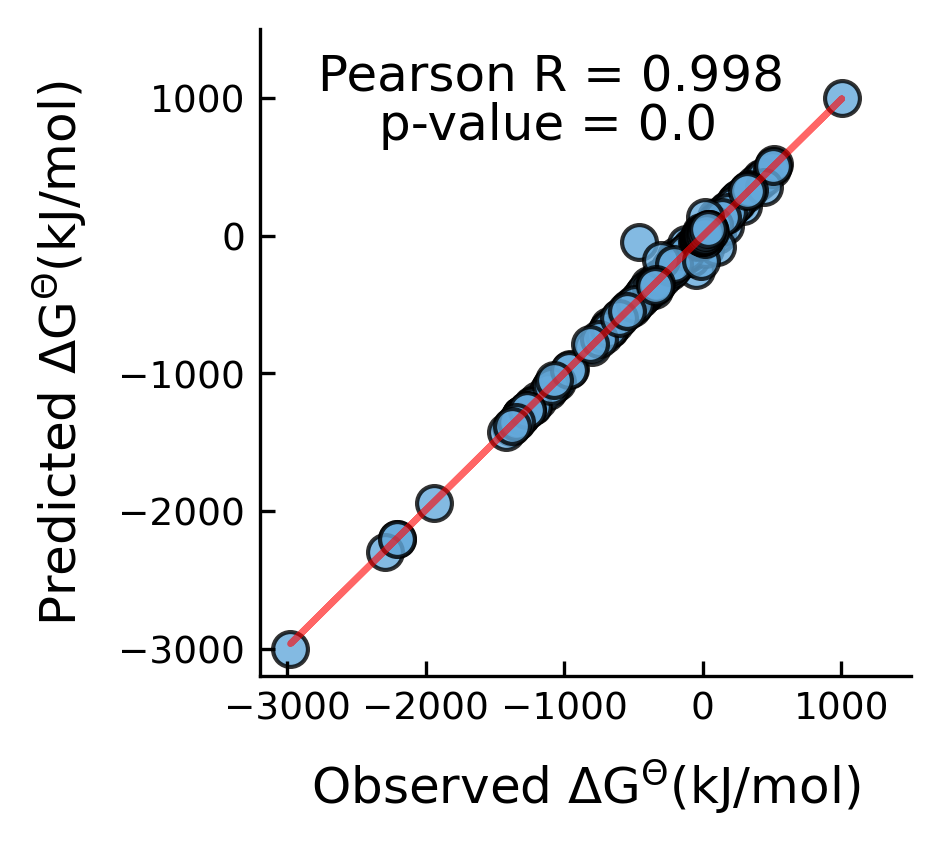

In [112]:
x = real_r
y = p
fit_y, pr, sr = rapid_linear_reg(x, y)

plt.figure(dpi=300, figsize=(2.8,2.8))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
lable_fs = 17
title_fs = 20

plt.scatter(x, y, color=color1, marker='o', alpha=0.8, edgecolors='black', s=70)
plt.plot(x, fit_y,c = 'red',linewidth=1.6 , alpha = 0.6)

plt.text(x=-2780, y=1050, s='Pearson R = {0}'.format(np.around(pr[0], decimals=3)), fontsize = 12)
plt.text(x=-2335, y=700, s='p-value = {0}'.format(np.around(pr[1], decimals=3)), fontsize = 12)

plt.xticks(range(-3000, 1300, 1000), fontsize=9)
plt.yticks(range(-3000, 1300, 1000), fontsize=9)

plt.ylabel(r'Predicted $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=12, labelpad=7)
plt.xlabel(r'Observed $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=12, labelpad=7)

plt.ylim(-3200,1500)
plt.xlim(-3200,1500)
plt.show()

Reading the cross validation results data of CC method and AF method

In [147]:
# CC method
cc = pd.read_csv('../data/results_data/cc_and_af/cc.csv', index_col=0)
np.load('../data/results_data/cc_and_af/cc_loocv.npz')
cc_r = cc['r']
cc_p = cc['LOOCV']
cc_e = cc_p-cc_r
cc_ae = np.abs(cc_e)

# AF method
af = pd.read_csv('../data/results_data/cc_and_af/af.csv', index_col=0)
af_r = af['r']
af_p = af['LOOCV']
af_e = af_p-af_r
af_ae = np.abs(af_e)

Fig 2.

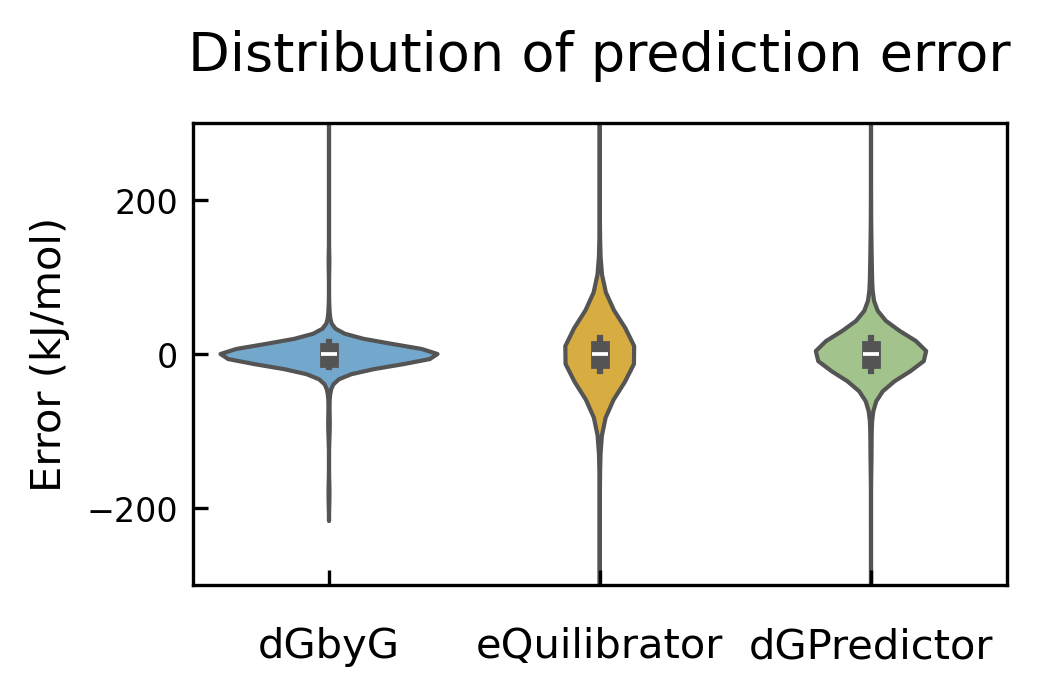

In [114]:
df1 = pd.DataFrame(data={'e':e, 'tool':'dGbyG'})
df2 = pd.DataFrame(data={'e':cc_e, 'tool':'eQuilibrator'})
df3 = pd.DataFrame(data={'e':af_e, 'tool':'dGPredictor'})
df = pd.concat([df1,df2,df3], axis=0, ignore_index=True)

plt.figure(dpi=300,figsize = (3.5,2))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax= plt.axes()
ax.xaxis.set_tick_params(pad=10)

plt.title(label='Distribution of prediction error', fontsize=13, x=0.5, y=1.06)
sns.violinplot(data=df, x='tool', y='e', hue='tool', palette=[color1, color2, color3], 
               bw_adjust=1.8, common_norm=True, linewidth=1, inner='box')
plt.yticks(fontsize = 8)
plt.xticks(ticks=[0,1,2],labels=['dGbyG', 'eQuilibrator', 'dGPredictor'], fontsize=10)

plt.ylabel('Error (kJ/mol)', fontsize=10)
plt.xlabel('')

plt.ylim(-300,300)
plt.show()

Fig 2.

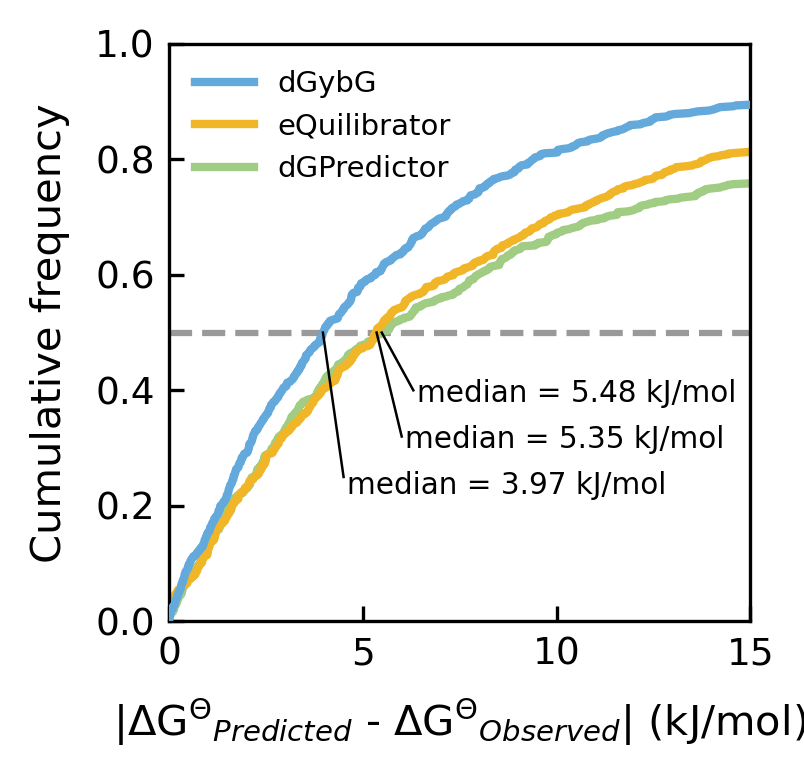

In [115]:
ae_sort = ae.copy()
ae_sort.sort()
density = np.arange(1,len(ae_sort)+1)/len(ae_sort)

cc_ae_sort = cc_ae.to_numpy()
cc_ae_sort.sort()
cc_density = np.arange(1,len(cc_ae_sort)+1)/len(cc_ae_sort)

af_ae_sort = af_ae.to_numpy()
af_ae_sort.sort()
af_density = np.arange(1,len(af_ae_sort)+1)/len(af_ae_sort)

plt.figure(dpi=300, figsize=(2.5,2.5))

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#plt.title(label='Cumulative distributions of\nabsolute prediction error', fontsize=10, x=0.5, y=1.01)

# dgbyg
l0, = plt.plot(ae_sort, density, linewidth=2, c=color1, zorder = 3, label='dGybG')
plt.plot([np.median(ae),4.5], [0.5,0.25], linewidth =0.6, color = 'black', zorder=4)
plt.text(x=4.59, y = 0.22, s='median = {0} kJ/mol'.format(np.around(np.median(ae), decimals=2)), fontsize=7.1)

# cc
l1, = plt.plot(cc_ae_sort, cc_density, linewidth=2, c=color2, zorder=2, label='eQuilibrator')
plt.plot([np.median(cc_ae),6], [0.5,0.32], linewidth=0.6, color='black', zorder=4)
plt.text(x = 6.09, y = 0.30, s='median = {0} kJ/mol'.format(np.around(np.median(cc_ae_sort), decimals=2)), fontsize=7.1)

# dGPredictor
l2, = plt.plot(af_ae_sort, af_density, linewidth=2, c=color3, zorder = 1, label='dGPredictor')
plt.plot([np.median(af_ae),6.3], [0.5,0.40], linewidth =0.6, color = 'black', zorder=4)
plt.text(x = 6.39, y = 0.38, s='median = {0} kJ/mol'.format(np.around(np.median(af_ae_sort), decimals=2)), fontsize=7.1)

plt.axhline(y=0.5, c = 'gray', linestyle = '--', linewidth=1.5, zorder=0, alpha=0.8)

plt.legend(handles=[l0,l1,l2], fontsize=7, frameon=False, )

plt.xlabel(r'|$\Delta$G$^{0}$$_{1}$ - $\Delta$G$^{0}$$_{2}$| (kJ/mol)'.format(chr(920),'{Predicted}', '{Observed}'), fontsize=10, labelpad=6)
plt.ylabel(r'Cumulative frequency', fontsize=10, labelpad=6)

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.xlim(0,15)
plt.ylim(0,1)
plt.show()

Reading the 10-fold cross validation results of unweighing dGbyG

In [116]:
results_dir = '../data/results_data/cross_validation_results'
Results_unweigh = []
Final_p_unweigh = []
R_unweigh = []
for n in range(0,50):
    name = '10_fold_cross_validation_unweighing_with_random_dG_'+str(n)
    loss = np.load(os.path.join(results_dir, name+'.npy')).mean(axis=0)
    res = pd.read_csv(os.path.join(results_dir, name+'.csv'), index_col=0)
    idx = np.argmin(loss)

    Results_unweigh.append(res)
    Final_p_unweigh.append(res.loc[:,str(idx)].to_numpy())
    R_unweigh.append(res['r'].to_numpy())

R_unweigh = np.array(R_unweigh)
Final_p_unweigh = np.array(Final_p_unweigh)

p_unweigh = Final_p_unweigh.mean(axis=0)
e_unweigh = p_unweigh - real_r
ae_unweigh = np.abs(e_unweigh)

print('Medain of absolute error:', np.median(ae_unweigh))
print('Mean of absolute error:', np.mean(ae_unweigh))

Medain of absolute error: 4.206241386999999
Mean of absolute error: 8.762570018176898


Fig 2.

0.060586791821933515 0.11584147668415491 LeveneResult(statistic=2.5835597948505744, pvalue=0.1253778354414227)
4.223901797178732 4.0338698555284385 Ttest_indResult(statistic=4.360906139523266, pvalue=0.00037667989984001033)


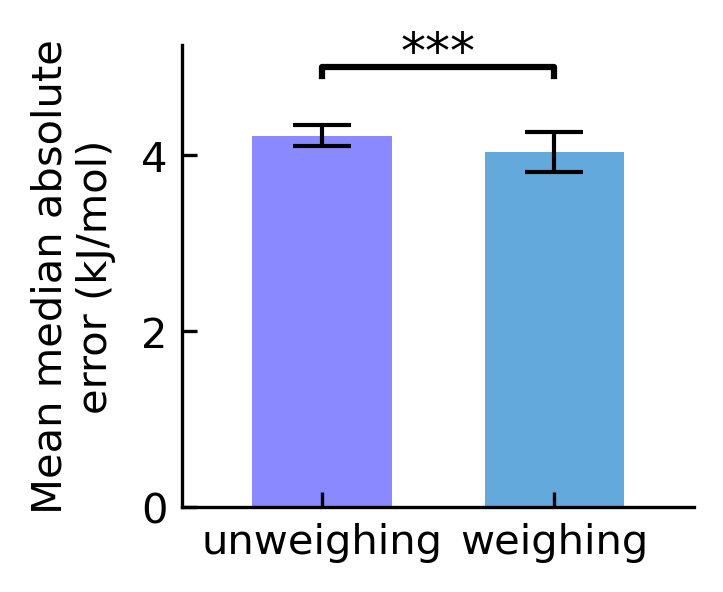

In [117]:
E = Final_p - real_r
E_unweigh = Final_p_unweigh - real_r

MAE = []
MAE_unweigh = []
for i in range(0,min(E.shape[0], E_unweigh.shape[0]),5):
    MAE.append(np.median(abs(E[i:i+5,].mean(axis=0))))
    MAE_unweigh.append(np.median(abs(E_unweigh[i:i+5,].mean(axis=0))))

plt.figure(dpi=300,figsize = (2.2,2))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

err_params=dict(elinewidth=1, ecolor='black', capsize=7)

colors = [color5, color1]
print(np.std(MAE_unweigh), np.std(MAE), scipy.stats.levene(MAE, MAE_unweigh))
print(np.mean(MAE_unweigh), np.mean(MAE), scipy.stats.ttest_ind(MAE_unweigh, MAE))

plt.bar(x=[0,1],height=[np.mean(MAE_unweigh),np.mean(MAE)], width=0.6, 
        edgecolor='none', color=colors, yerr=[np.std(MAE_unweigh)*1.96,np.std(MAE)*1.96], 
        error_kw=err_params)

plt.plot([0,0,1,1], [4.9,5,5,4.9], c='black')
plt.text(x=.5, y=5., s='***', fontsize=12, ha='center')

plt.xticks(ticks=[0,1], labels=['unweighing', 'weighing'], fontsize=10)
plt.yticks(fontsize=10)

plt.ylabel('Mean median absolute\nerror (kJ/mol)', fontsize=10, labelpad=6)

plt.xlim(-0.6,1.6)

plt.show()

Fig 3.

In [118]:
results_dir = '../data/results_data/cross_validation_results'
#Results = []
Final_p_5 = []
#R = []
for n in range(20):
    name = '5_fold_cross_validation_with_random_dG_'+str(n)
    loss = np.load(os.path.join(results_dir, name+'.npy')).mean(axis=0)
    res = pd.read_csv(os.path.join(results_dir, name+'.csv'), index_col=0)
    idx = np.argmin(loss)

    #Results.append(res)
    Final_p_5.append(res.loc[:,str(idx)].to_numpy())
    #R.append(res['r'].to_numpy())
#R = np.array(R)
Final_p_5 = np.array(Final_p_5)

p_5 = Final_p_5.mean(axis=0)
e_5 = p_5 - real_r
ae_5 = np.abs(e_5)

print('Medain of absolute error:', np.median(ae_5))
print('Mean of absolute error:', np.mean(ae_5))

Medain of absolute error: 3.9943993276613217
Mean of absolute error: 8.546966692690217


In [119]:
results_dir = '../data/results_data/cross_validation_results'
#Results = []
Final_p_2 = []
#R = []
for n in range(20):
    name = '2_fold_cross_validation_with_random_dG_'+str(n)
    loss = np.load(os.path.join(results_dir, name+'.npy')).mean(axis=0)
    res = pd.read_csv(os.path.join(results_dir, name+'.csv'), index_col=0)
    idx = np.argmin(loss)

    #Results.append(res)
    Final_p_2.append(res.loc[:,str(idx)].to_numpy())
    #R.append(res['r'].to_numpy())
#R = np.array(R)
Final_p_2 = np.array(Final_p_2)

p_2 = Final_p_2.mean(axis=0)
e_2 = p_2 - real_r
ae_2 = np.abs(e_2)

print('Medain of absolute error:', np.median(ae_2))
print('Mean of absolute error:', np.mean(ae_2))

Medain of absolute error: 4.1003954499999935
Mean of absolute error: 9.458792006092187


The linear model is: Y = -1.3717 + 0.99501X
PearsonRResult(statistic=0.9976162987242027, pvalue=0.0)
SignificanceResult(statistic=0.929609877106968, pvalue=5.8553873507727634e-294)
The linear model is: Y = -1.5506 + 0.99476X
PearsonRResult(statistic=0.9975894156918409, pvalue=0.0)
SignificanceResult(statistic=0.9311952583263168, pvalue=3.61180828108324e-297)
The linear model is: Y = -2.2856 + 0.99463X
PearsonRResult(statistic=0.997234903472165, pvalue=0.0)
SignificanceResult(statistic=0.9252955954572071, pvalue=1.3669818033796273e-285)
The linear model is: Y = -3.7309e+11 + 3.245e+08X
PearsonRResult(statistic=0.021226238011239084, pvalue=0.5808465924765888)
SignificanceResult(statistic=0.8553350026142384, pvalue=1.5780057876145426e-195)
The linear model is: Y = -1.764e+11 + 4.1682e+08X
PearsonRResult(statistic=0.027605458755932146, pvalue=0.4726683309367915)
SignificanceResult(statistic=0.6887982870359016, pvalue=1.1952972731268794e-96)
The linear model is: Y = -1.131e+12 + -1.0732e+09

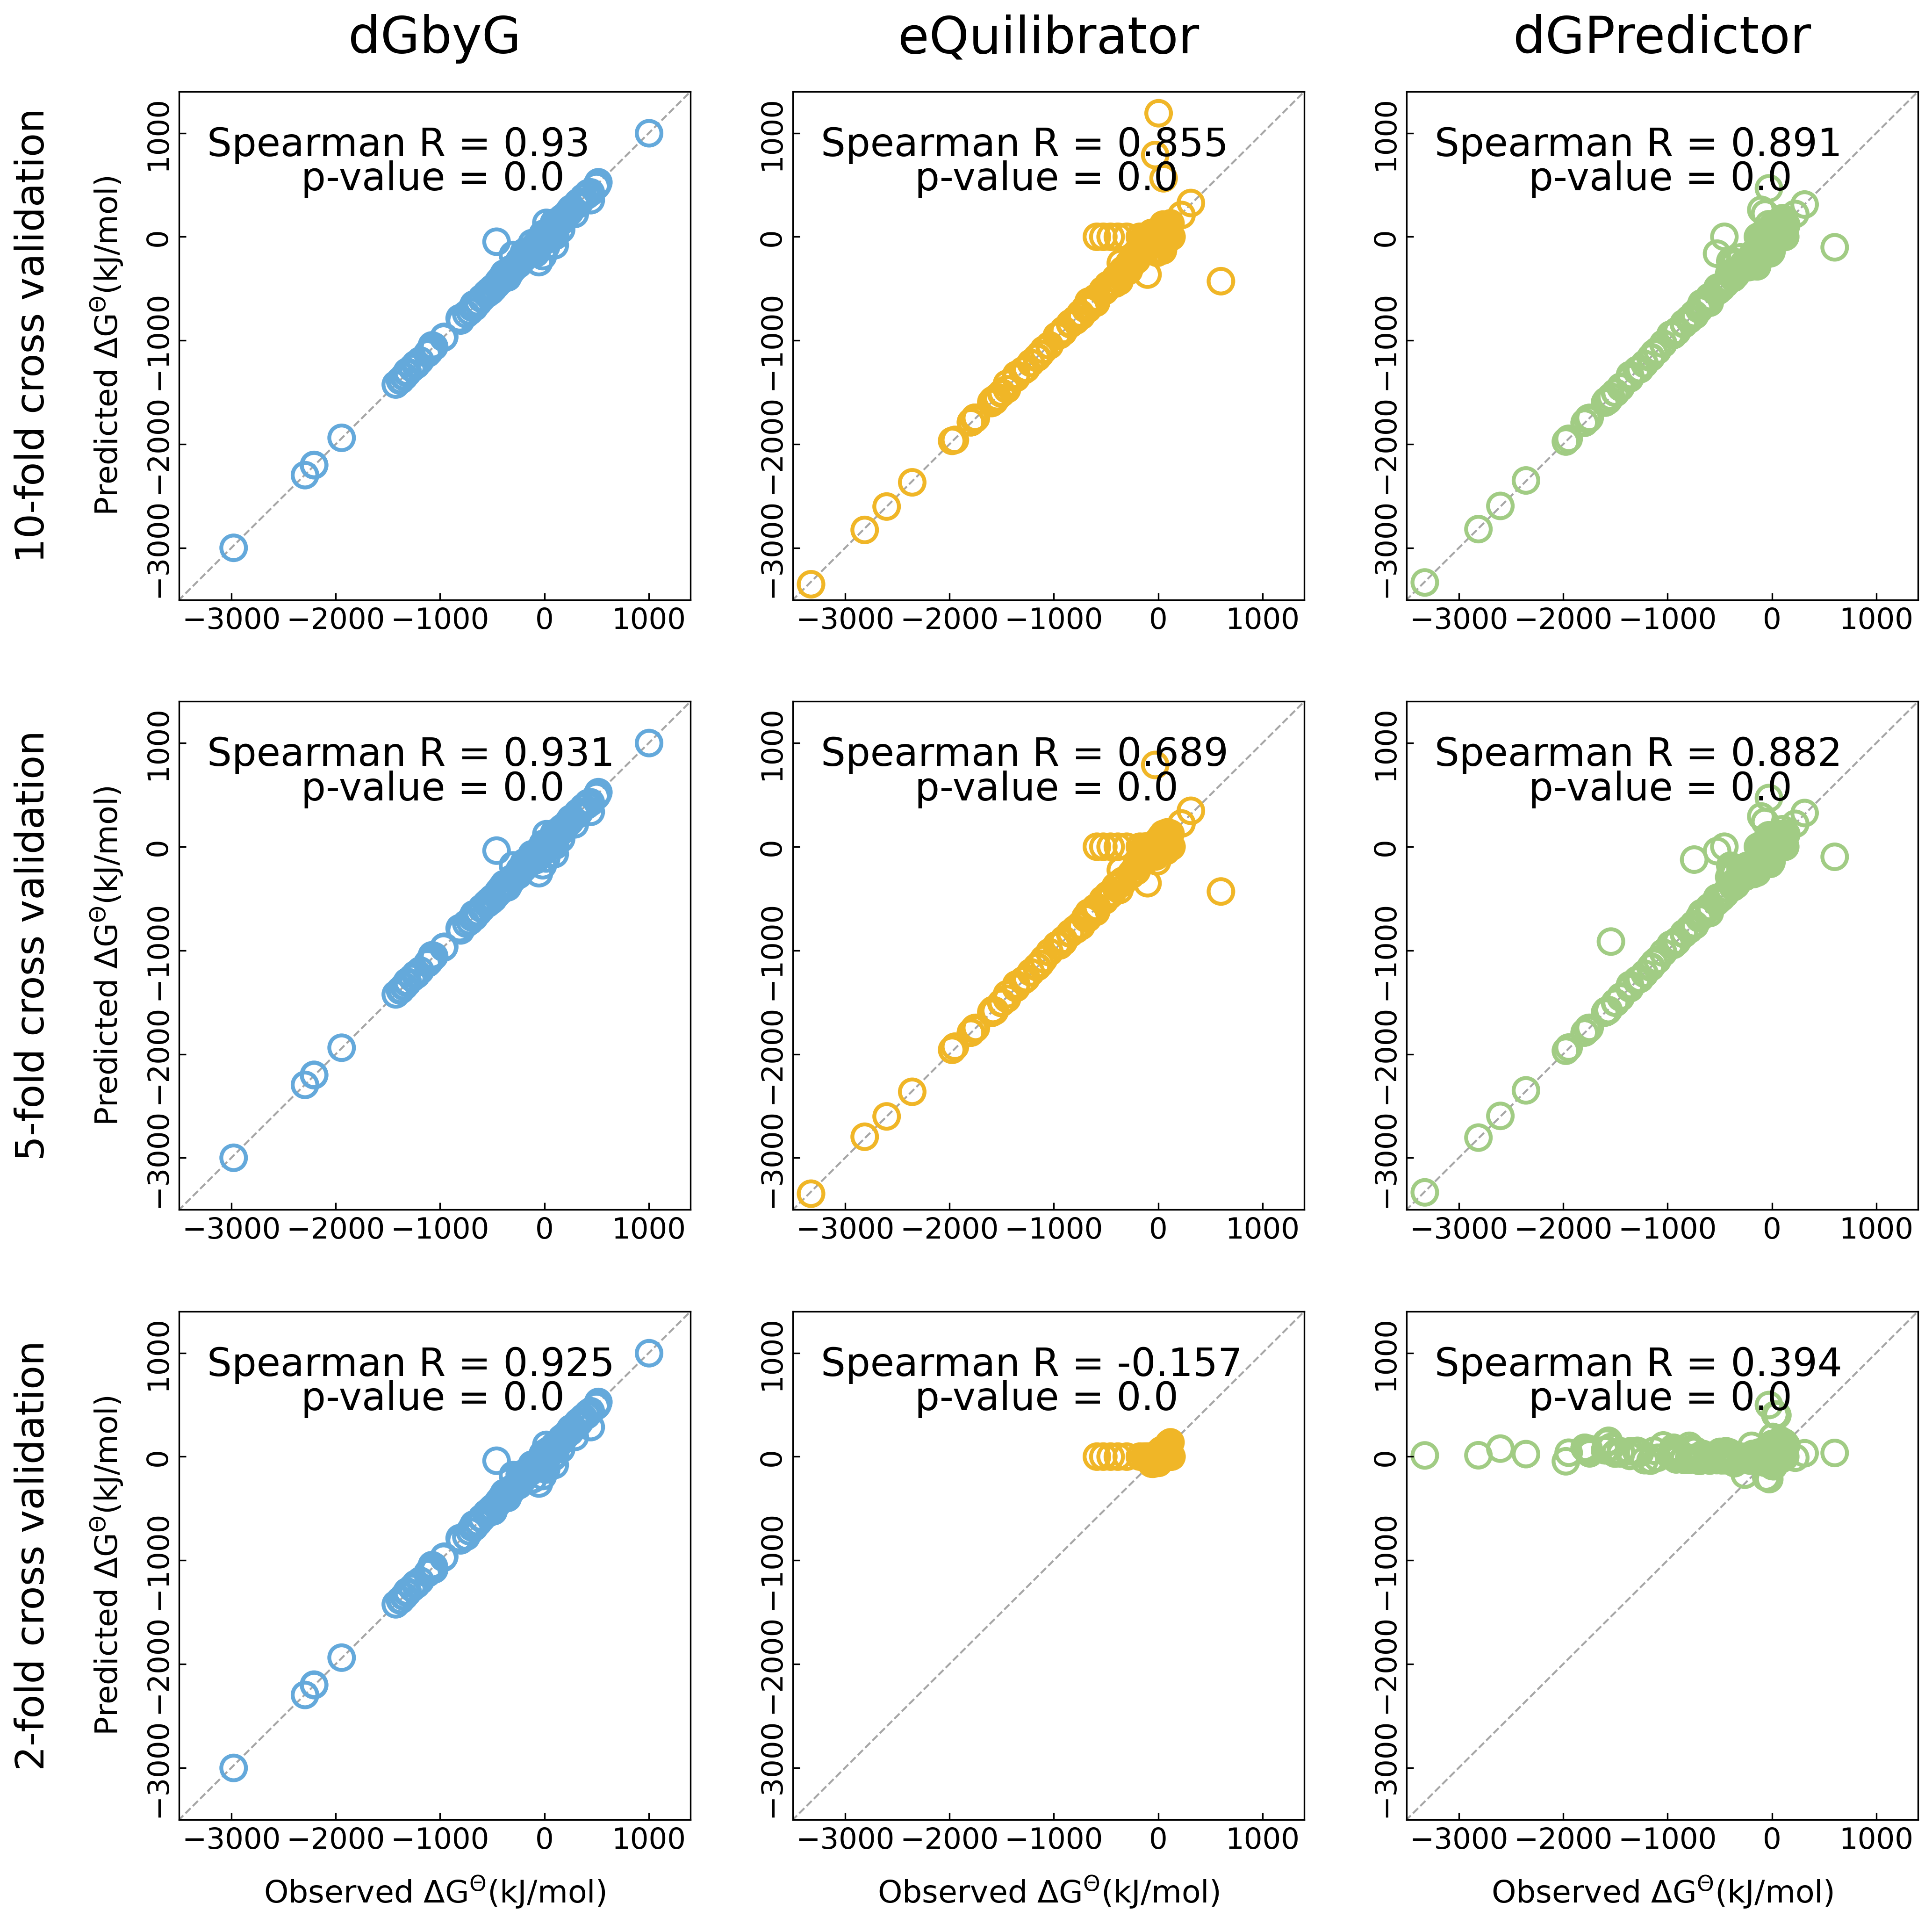

In [120]:
SR = []

plt.figure(dpi=300,figsize = (16,16))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
lable_fs = 16
title_fs = 26
text_fs = 20
R_x, R_y = (-3230, 780)
P_x, P_y = (-2330, 450)
ticks_fs = 15

# dGbyG 10-fold
plt.subplot(3,3,1)
plt.title('dGbyG', fontsize=title_fs, fontweight='normal', pad=20)
plt.text(s='10-fold cross validation', x=-4900, y=-950, fontsize=text_fs,fontweight='normal',rotation=90, ha='center', va='center')

fit_y, pr, sr = rapid_linear_reg(real_r, p)

plt.scatter(x=real_r, y=p, c='none', edgecolors=(100/256,170/256,220/256), s=160, linewidths=2)
#plt.plot(r, fit_y, linewidth = 2, color='gray', alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')
(255/256,134/256,250/256)

plt.xticks(range(-3000, 1300, 1000), fontsize = ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize = ticks_fs, rotation=90, va='center')

plt.ylabel(r'Predicted $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=lable_fs, labelpad=10)

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])

# dGbyG 5-fold
plt.subplot(3,3,4)
plt.text(s='5-fold cross validation', x=-4900, y=-950, fontsize=text_fs,fontweight='normal', rotation=90, ha='center', va='center')

fit_y, pr, sr = rapid_linear_reg(real_r, p_5)

plt.scatter(x=real_r, y=p_5, c='none', edgecolors=(100/256,170/256,220/256), s=160, linewidths=2)
#plt.plot(r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylabel(r'Predicted $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=lable_fs, labelpad=10)

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])

# dGbyG 2-fold
plt.subplot(3,3,7)
plt.text(s='2-fold cross validation', x=-4900, y=-950, fontsize=text_fs,fontweight='normal', rotation=90, ha='center', va='center')

fit_y, pr, sr = rapid_linear_reg(real_r, p_2)

plt.scatter(x=real_r, y=p_2, c='none', edgecolors=(100/256,170/256,220/256), s=160, linewidths=2)
#plt.plot(r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize = ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylabel(r'Predicted $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=lable_fs, labelpad=10)
plt.xlabel(r'Observed $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=lable_fs, labelpad=10)

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])

# CC 10-fold
plt.subplot(3,3,2)
plt.title('eQuilibrator', fontsize=title_fs, fontweight='normal',pad=20)

fit_y, pr, sr = rapid_linear_reg(cc_r, cc['10 fold CV'])

plt.scatter(x=cc_r, y=cc['10 fold CV'], c='none', edgecolors=(241/256,183/256,39/256), s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize = ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])

# CC 5-fold CV
plt.subplot(3,3,5)

fit_y, pr, sr = rapid_linear_reg(cc_r, cc['5 fold CV'])

plt.scatter(x=cc_r, y=cc['5 fold CV'], c='none', edgecolors=(241/256,183/256,39/256), s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])


# CC 2-fold CV
plt.subplot(3,3,8)

fit_y, pr, sr = rapid_linear_reg(cc_r, cc['2 fold CV'])

plt.scatter(x=cc_r, y=cc['2 fold CV'], c='none', edgecolors=(241/256,183/256,39/256), s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

plt.xlabel(r'Observed $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=lable_fs, labelpad=10)

SR.append(sr[0])


# AF 10-fold CV
plt.subplot(3,3,3)
plt.title('dGPredictor', fontsize=title_fs, fontweight='normal',pad=20)

fit_y, pr, sr = rapid_linear_reg(af_r, af['10 fold CV'])

plt.scatter(x=af_r, y=af['10 fold CV'], c='none', edgecolors=color3, s=160, linewidths=2)
#plt.plot(af_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize = ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])

# AF 5-fold CV
plt.subplot(3,3,6)

fit_y, pr, sr = rapid_linear_reg(af_r, af['5 fold CV'])

plt.scatter(x=af_r, y=af['5 fold CV'], c='none', edgecolors=color3, s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])


# AF 2-fold CV
plt.subplot(3,3,9)

fit_y, pr, sr = rapid_linear_reg(af_r, af['2 fold CV'])

plt.scatter(x=af_r, y=af['2 fold CV'], c='none', edgecolors=color3, s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

plt.xlabel(r'Observed $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=lable_fs, labelpad=10)

SR.append(sr[0])


plt.show()

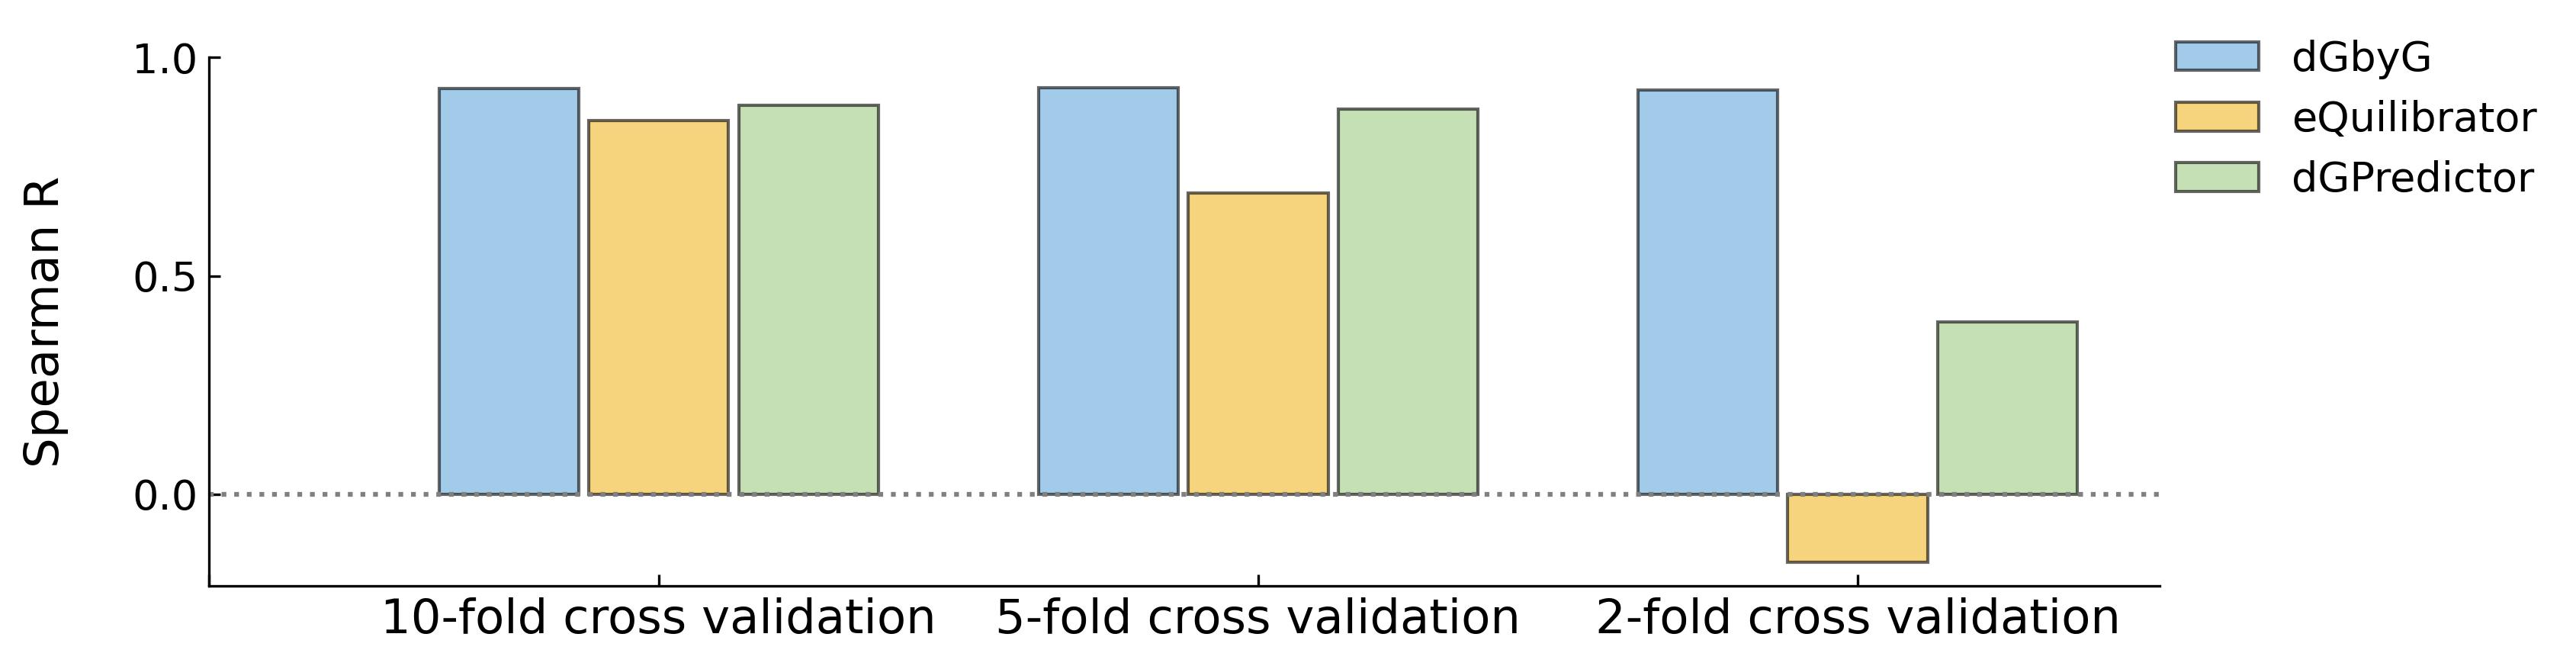

In [158]:
plt.figure(dpi=300,figsize = (11,3))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

colors = [color1,color2,color3,]
n = len(colors)

bar_width = 1.4/n

for i in range(n):
    center_point = 1.5 * ((2 * i + 1) / (2 * n) - 0.5)
    plt.bar(x=[1+center_point, 3+center_point, 5+center_point],height=SR[3*i:3*(i+1)], color=colors[i], edgecolor='black', width=bar_width, alpha=0.6, align='center')
#plt.bar(x=[1.02,3.02,5.02],height=R[3:6], color=color2, edgecolor='black', width=bar_width-0.02, alpha=0.6, align='edge')
#plt.bar(x=[1,2,3,4,5,6],height=R[6:9], color=color3)

#plt.ylabel(r'Median Absolute Error (kJ/mol)', fontsize=20)
plt.ylabel(r'Spearman R', fontsize = 15, labelpad=20)

plt.yticks([0, 0.5, 1.0], fontsize= 13)
plt.xticks([-0.5, 1,3,5], [None, '10-fold cross validation', '5-fold cross validation', '2-fold cross validation'], fontsize=15)

plt.legend(['dGbyG', 'eQuilibrator', 'dGPredictor'], fontsize = 13, frameon=False, loc=(1,0.7))

plt.axhline(y=0, linestyle=':', c='gray')

plt.show()

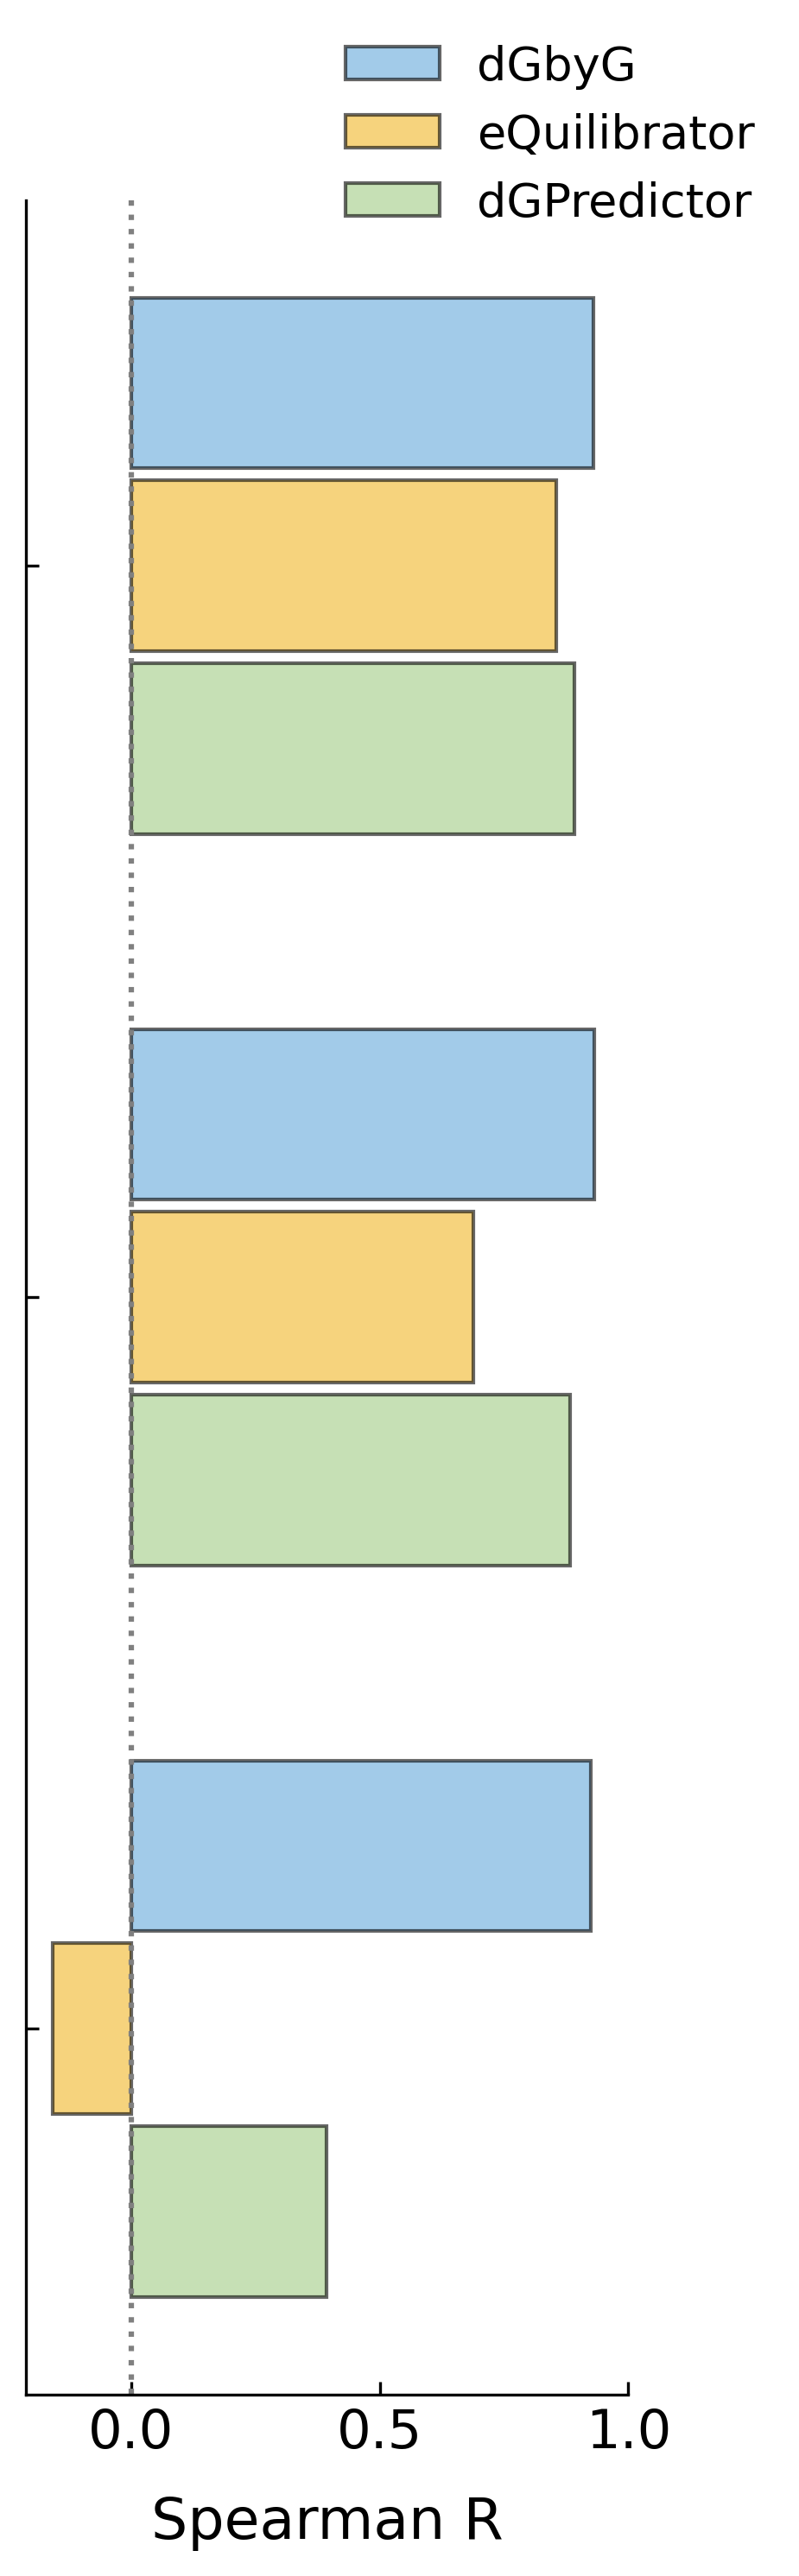

In [168]:
plt.figure(dpi=300,figsize = (3,11))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.invert_yaxis()
#ax.xaxis.set_ticks_position('top')
#ax.xaxis.set_label_position('top')
ax.set_xlabel

for i in range(n):
    center_point = 1.5 * ((2 * i + 1) / (2 * n) - 0.5)
    plt.barh(y=[1+center_point, 3+center_point, 5+center_point], width=SR[3*i:3*(i+1)], color=colors[i], edgecolor='black', height=bar_width, alpha=0.6, align='center')

plt.legend(['dGbyG', 'eQuilibrator', 'dGPredictor'], fontsize = 13, frameon=False, loc=(0.5,0.98))

plt.plot([0,0],[0,6], linestyle=':', c='gray')
plt.ylim(6,0)
plt.xlabel(r'Spearman R', fontsize =lable_fs, labelpad=10)

plt.xticks([0, 0.5, 1.0], fontsize=ticks_fs)
plt.yticks([1,3,5], [None,None,None], fontsize=13, rotation=90, va='center')


plt.show()

Reading Recon3D transformed standard dGr prime 